In [33]:
import time
import csv
from selenium import webdriver
from openpyxl import Workbook, load_workbook
   
#크롤링    
def article_Scraping():
    article_list=[]
    driver = webdriver.Chrome('C:\\Users\\user\\Downloads\\chromedriver.exe')
    for i in range(1,20):
        driver.get('https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page='+str(i))
        time.sleep(1)
        articles =  driver.find_elements_by_css_selector('#section_body > ul > li > dl > dt > a')
        for article in articles:
            article_list.append(article.text)
            #print(article.text)
            
    driver.quit()
    inset_Data_to_csv(article_list)

#text 파일로 저장     
def inset_Data_to_csv(article_list):  
    f = open(f'itnews07303.txt','w',encoding='utf-8-sig',newline='')#,newline=''
    csvWriter = csv.writer(f)
    csvWriter.writerow(article_list)
    #print(article_list)
#     for i in article_list:        
#         article = i.replace(',','')
#         print(article)
#         csvWriter.writerow(article+"\n")
        
    f.close()
       
article_Scraping()    


{'코로나': 55, '삼성': 45, '개발': 30, '네이버': 24, '전자': 21, '기술': 20, '종합': 16, '시장': 15, '치료': 14, '제': 14, '위': 14, '반도체': 14, '로': 14, '영업': 14, '게임': 13, '센서': 12, '진단': 11, '더': 11, '갤럭시': 11, '국내': 11, '익': 11, '고요한': 11, '스마트폰': 10, '기업': 10, '자율': 10, '화웨이': 9, '폰': 9, '폴드': 9, '중': 9, '인공': 9, '카카오': 9, '애플': 8, '세계': 8, '비대': 8, '백신': 8, '인텔': 8, '년': 8, '산업': 7, '용': 7, '최초': 7, '데이터': 7, '방': 7, '미국': 7, '시대': 7, '로봇': 7, '행차': 7, '한국': 7, '청각장애': 7, '택시': 7, '감염': 6, '매출': 6, '디지털': 6, '성공': 6, '상용': 6, '바이오': 6, '컨콜': 6, '클라우드': 6, '라인': 6, '이익': 6, '새': 6, '사업': 6, '대표': 6, '감지': 6, '박정호': 6, '휴가': 6, '규제': 6, '의': 6, '라이': 6, '단백질': 6, '등': 6, '확인': 5, '임': 5, '내': 5, '역대': 5, '최고': 5, '서비스': 5, '온라인': 5, '우리': 5, '실리콘': 5, '머리카락': 5, '소재': 5, '구글': 5, '스': 5, '명': 5, '수': 5, '테스트': 5, '비용': 5, '모바일': 5, '홈': 5, '배달': 5, '카톡': 5, '핵심': 5, '등록': 5, '거래': 4, '이용자': 4, '상반기': 4, '하반기': 4, '돌파': 4, '최대': 4, '뉴딜': 4, '곳': 4, '처럼': 4, '확대': 4, '퀄컴': 4, '콜': 4, '휴대폰': 4, '화학': 4, '신속

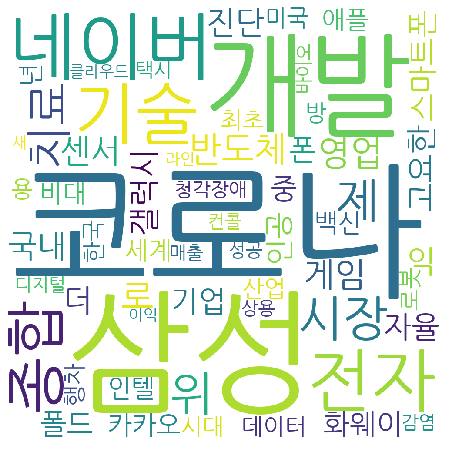

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Twitter
from collections import Counter
%matplotlib inline


file = open('C:\\Users\\user\\PycharmProjects\\itnews07303.txt','r',encoding='utf-8')#,encoding='utf-8'
lists = file.readlines()
file.close()
#print(lists)

twitter = Twitter()
morphs=[]
for sentence in lists:
    morphs.append(twitter.pos(sentence))
#print(morphs)


naa_list=[]
for sentence in morphs:
    for word, tag in sentence:
        if tag in['Noun'] and('것' not in word):
            naa_list.append(word)
#print(naa_list)

count = Counter(naa_list)
words = dict(count.most_common())
tags = count.most_common(60) #단어 30개까지
print(words)
#print(tags)

#d워드클라우드 만들기
fonts='C:\\Users\\user\\Downloads\\Nanum\\NanumGothic.ttf'
wordcloud = WordCloud(font_path=fonts, background_color='white',width=1000,height=1000)

#cloud = wordcloud.generate(words)
cloud = wordcloud.generate_from_frequencies(words)
cloud = wordcloud.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,8))
plt.axis('off')#x,y,축 숫자 제거
plt.imshow(cloud)
plt.show()
# plt.savefig()

In [ ]:
import time
import csv
from selenium import webdriver
from openpyxl import Workbook, load_workbook
   
#크롤링    
def article_Scraping():
    article_list=[]
    driver = webdriver.Chrome('C:\\Users\\user\\Downloads\\chromedriver.exe')
    for i in range(1,20):
        driver.get('https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page='+str(i))
        time.sleep(1)
        articles =  driver.find_elements_by_css_selector('#section_body > ul > li > dl > dt > a')
        for article in articles:
            article_list.append(article.text)
            #print(article.text)
            
    driver.quit()
    inset_Data_to_csv(article_list)

#text 파일로 저장     
def inset_Data_to_csv(article_list):  
    f = open(f'itnews07303.txt','w',encoding='utf-8-sig',newline='')#,newline=''
    csvWriter = csv.writer(f)
    csvWriter.writerow(article_list)
    #print(article_list)
#     for i in article_list:        
#         article = i.replace(',','')
#         print(article)
#         csvWriter.writerow(article+"\n")
        
    f.close()
       
article_Scraping()    


C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


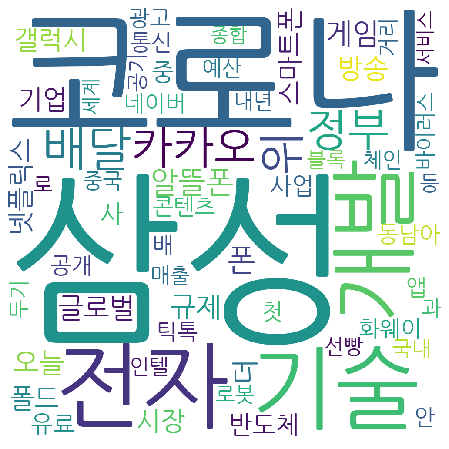

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Twitter
from collections import Counter
import time
import csv
from selenium import webdriver
from openpyxl import Workbook, load_workbook
%matplotlib inline


def article_Scraping():
    article_list=[]
    driver = webdriver.Chrome('C:\\Users\\user\\Downloads\\chromedriver.exe')
    for i in range(1,20):
        driver.get('https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page='+str(i))
        time.sleep(1)
        articles =  driver.find_elements_by_css_selector('#section_body > ul > li > dl > dt > a')
        for article in articles:
            article_list.append(article.text)
            #print(article.text)
            
    driver.quit()
    inset_Data_to_csv(article_list)

#text 파일로 저장     
def inset_Data_to_csv(article_list):  
    f = open(f'itnews0901.txt','w',encoding='utf-8-sig',newline='')#,newline=''
    csvWriter = csv.writer(f)
    csvWriter.writerow(article_list)        
    f.close()
       
article_Scraping()   



file = open('C:\\Users\\user\\PycharmProjects\\itnews0901.txt','r',encoding='utf-8')#,encoding='utf-8'
lists = file.readlines()
file.close()
#print(lists)

twitter = Twitter()
morphs=[]
for sentence in lists:
    morphs.append(twitter.pos(sentence))
#print(morphs)


naa_list=[]
for sentence in morphs:
    for word, tag in sentence:
        if tag in['Noun'] and('것' not in word):
            naa_list.append(word)
#print(naa_list)

count = Counter(naa_list)
words = dict(count.most_common())
tags = count.most_common(60) #단어 30개까지
#print(words)
#print(tags)

#d워드클라우드 만들기
fonts='C:\\Users\\user\\Downloads\\Nanum\\NanumGothic.ttf'
wordcloud = WordCloud(font_path=fonts, background_color='white',width=1000,height=1000)

#cloud = wordcloud.generate(words)
cloud = wordcloud.generate_from_frequencies(words)
cloud = wordcloud.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,8))
plt.axis('off')#x,y,축 숫자 제거
plt.imshow(cloud)
plt.show()
# plt.savefig()